In [1]:
"""
===========================================================
Using PyPARRM to filter out stimulation artefacts from data
===========================================================

This example demonstrates how the PARRM algorithm :footcite:`DastinEtAl2021`
can be used to identify and remove stimulation artefacts from
electrophysiological data in the PyPARRM package.
"""

import numpy as np
import cupy as cp
from matplotlib import pyplot as plt

import sys
import sys
sys.path.append('C:/Users/User/Documents/GitHub/UGRP/tool_code/python_tool_code/function/') # "~~/tool_code/plot/" (상대 경로)
sys.path.append('C:/Users/User/Documents/GitHub/UGRP/tool_code/python_tool_code/frequency_dataset_generation/')

from DataPlot import Data_Load_Plot, Result_Plot, Result_Plot_paper, Loss_Plot
from Scaling import time_scaling, time_inv_scaling
from FFT_func import FFT

sys.path.append('C:/Users/User/Documents/GitHub/UGRP/existing_SAC/PARRM/PyPARRM-main/src/pyparrm')

from parrm import PARRM
from _utils._power import compute_psd

fpath = "C:/Users/User/Documents/GitHub/UGRP/data/synthetic_data/"
data = np.load(fpath + "contaminated_by_realistic" + ".npy")

fs = 2000  # Hz
artefact_freq = 130  # Hz

print(
    f"`data` has shape: ({data.shape[0]} channel, "
    f"{data.shape[1]} timepoints)\n"
    f"`data` duration: {data.shape[1] / fs :.2f} seconds"
)

c:\Users\User\anaconda3\envs\torch1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


`data` has shape: (1000 channel, 4000 timepoints)
`data` duration: 2.00 seconds


In [2]:
import cupy as cp

parrm = PARRM(
    data=data,
    sampling_freq=fs,
    artefact_freq=artefact_freq,
    verbose=False,  # silenced to reduce pqdm output clutter
)
# parrm.find_period()

print(f"Estimated artefact period: {parrm.period :.4f}")

Estimated artefact period: 16.0000


In [3]:
winTime = 0.5 
skipTime = winTime / 10  
perDist = 0.01
winSize = int(fs*winTime)  
skipSize = int(fs*skipTime)
winDir = "both"

parrm.create_filter(
    filter_half_width=winSize,
    omit_n_samples=skipSize,
    filter_direction=winDir,
    period_half_width=perDist,
)

filtered_data = parrm.filter_data()  # other data to filter can be given here

# comparison to true artefact-free data
artefact_free = np.load(fpath + "clean_data" + ".npy")

In [4]:
# t = np.linspace(0, 2, num=4000) 
# start_time = 1; # [sec]
# end_time = 2; # [sec]
# start_pts = start_time*fs
# end_pts = end_time*fs
# times = np.arange(end_pts - start_pts) / fs

# fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# inset_axis = axes[0].inset_axes((0.12, 0.6, 0.5, 0.35))

# # main timeseries plot
# axes[0].plot(
#     times, data[0, start_pts:end_pts], color="black", alpha=0.3, label="Unfiltered"
# )
# axes[0].plot(
#     times, artefact_free[0, start_pts:end_pts], linewidth=3, label="Artefact-free"
# )
# axes[0].plot(times, filtered_data[0, start_pts:end_pts], label="Filtered (PyPARRM)")
# axes[0].legend()
# axes[0].set_xlabel("Time (s)")
# axes[0].set_ylabel("Amplitude (mV)")

# # timeseries inset plot
# inset_axis.plot(times[:50], artefact_free[0, start_pts : start_pts + 50], linewidth=3)
# inset_axis.plot(times[:50], filtered_data[0, start_pts : start_pts + 50])
# axes[0].indicate_inset_zoom(inset_axis, edgecolor="black", alpha=0.4)
# inset_axis.patch.set_alpha(0.7)

# # power spectral density plot
# n_freqs = fs / 2
# psd_freqs, psd_raw = compute_psd(
#     data[0, start_pts:end_pts], fs, int(n_freqs * 2)
# )
# _, psd_filtered = compute_psd(
#     filtered_data[0, start_pts:end_pts], fs, int(n_freqs * 2)
# )
# _, psd_artefact_free = compute_psd(
#     artefact_free[0, start_pts:end_pts], fs, int(n_freqs * 2)
# )

# axes[1].loglog(
#     psd_freqs, psd_raw, color="black", alpha=0.3, label="Unfiltered"
# )
# axes[1].loglog(
#     psd_freqs, psd_artefact_free, linewidth=3, label="Artefact-free"
# )
# axes[1].loglog(psd_freqs, psd_filtered, label="Filtered (PyPARRM)")
# axes[1].legend()
# axes[1].set_xlabel("Log frequency (Hz)")
# axes[1].set_ylabel("Log power (dB/Hz)")

# fig.tight_layout()
# fig.show()

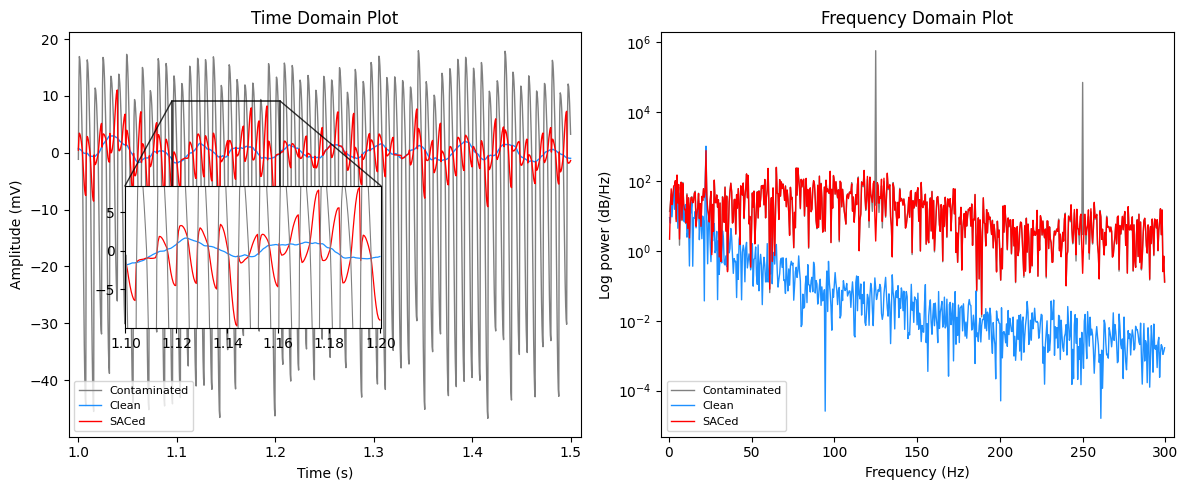

<Time Domain Error>
Mean Absolute Error: 1.9476
Mean Squared Error: 7.9037
<Frequency Domain Error>
Mean Absolute Error: 16.2682
Mean Squared Error: 2574.345


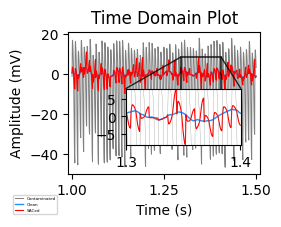

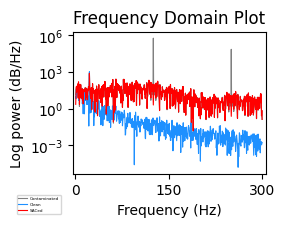

<Time Domain Error>
Mean Absolute Error: 1.9476
Mean Squared Error: 7.9037
<Frequency Domain Error>
Mean Absolute Error: 16.2682
Mean Squared Error: 2574.345


In [6]:
save_path = '../../../../result/paper/'
save_title = 'PARRM'
Result_Plot(data, filtered_data, artefact_free, save_path, save_title)
Result_Plot_paper(data, filtered_data, artefact_free, save_path, save_title)